In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

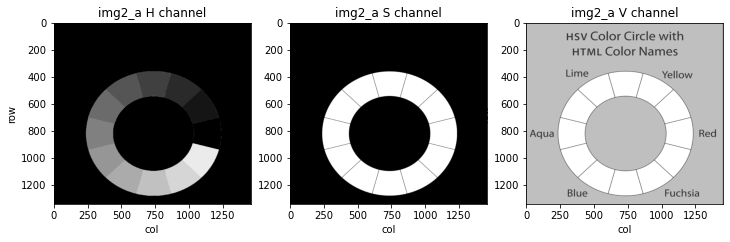

In [8]:
img2_a = cv2.imread('images\Figure2-a.png')      # read image
img2_a = cv2.cvtColor(img2_a, cv2.COLOR_BGR2HSV)
H, S, V    = cv2.split(img2_a)

fig        = plt.figure(figsize=(12, 4))
HSVplot_H  = fig.add_subplot(1,3,1)
HSVplot_H.set_xlabel('col')
HSVplot_H.set_ylabel('row')
HSVplot_H.set_title('img2_a H channel')
HSVplot_H.imshow(H, cmap='gray')

HSVplot_S  = fig.add_subplot(1,3,2)
HSVplot_S.set_xlabel('col')
HSVplot_S.set_ylabel('row')
HSVplot_S.set_title('img2_a S channel')
HSVplot_S.imshow(S, cmap='gray')

HSVplot_V  = fig.add_subplot(1,3,3)
HSVplot_V.set_xlabel('col')
HSVplot_V.set_ylabel('row')
HSVplot_V.set_title('img2_a V channel')
HSVplot_V.imshow(V, cmap='gray')

## Task 3.1

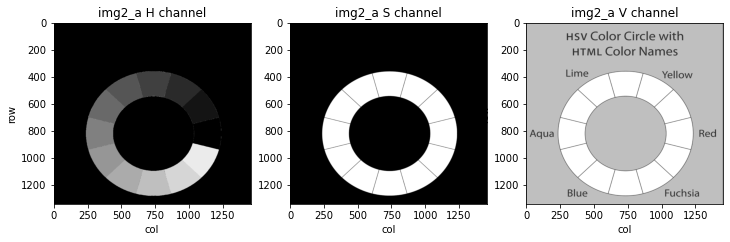

In [9]:
#NOTE Task 3.1
img2_a = cv2.imread('images\Figure2-a.png')      # read image
img2_a = cv2.cvtColor(img2_a, cv2.COLOR_BGR2RGB)

def cv_PixelRGB2HSV(R, G, B):
    '''convert the RGB pixel to the HSV pixel. 

        Args:
            R (np.array): R value
            G (np.array): G value
            B (np.array): B value

        Returns:
            HSV pixel
    '''
    # first, normalise
    R = R / 255
    G = G / 255
    B = B / 255
    # using the conversation formular
    Cmax = max(R, G, B)
    Cmin = min(R, G, B)
    Δ = Cmax - Cmin
    
    H = None
    if Δ == 0:
        H = 0
    elif Cmax == R:
        if G >= B:
            H = 60 * (((G - B) / Δ))
        else:
            H = 60 * (((G - B) / Δ)) + 360
    elif Cmax == G:
        H = 60 * (((B - R) / Δ) + 2)
    elif Cmax == B:
        H = 60 * (((R - G) / Δ) + 4)    
    
    S = None
    if Cmax == 0:
        S = 0
    else:
        S = Δ / Cmax
        
    V = Cmax
    
    return (H / 2, S * 255, V * 255)

def cv_RGB2HSV(img):
    '''convert a RGB image to a HSV image

        Args:
            img (np.array): this is the image going to be converted

        Returns:
            np.array: HSV image
    '''
    rs, cs, d = img.shape
    img2_a_1  = np.empty([rs, cs, d], dtype = img.dtype)
    # for every row and every column
    for r in range(rs):
        for c in range(cs):
            RGB_pixel      = img[r][c]
            HSV_pixel      = cv_PixelRGB2HSV(RGB_pixel[0], RGB_pixel[1], RGB_pixel[2])
            img2_a_1[r][c] = np.array(HSV_pixel)
    return img2_a_1
            
HSV_img2_a = cv_RGB2HSV(img2_a)
H, S, V    = cv2.split(HSV_img2_a) # split it into three channels

fig        = plt.figure(figsize=(12, 4))

HSVplot_H  = fig.add_subplot(1,3,1)
HSVplot_H.set_xlabel('col')
HSVplot_H.set_ylabel('row')
HSVplot_H.set_title('img2_a H channel')
HSVplot_H.imshow(H, cmap='gray')

HSVplot_S  = fig.add_subplot(1,3,2)
HSVplot_S.set_xlabel('col')
HSVplot_S.set_ylabel('row')
HSVplot_S.set_title('img2_a S channel')
HSVplot_S.imshow(S, cmap='gray')

HSVplot_V  = fig.add_subplot(1,3,3)
HSVplot_V.set_xlabel('col')
HSVplot_V.set_ylabel('row')
HSVplot_V.set_title('img2_a V channel')
HSVplot_V.imshow(V, cmap='gray')

## Task 3.2

{1: 416, 2: 834, 3: 1250, 4: 1668}


<function matplotlib.pyplot.show(close=None, block=None)>

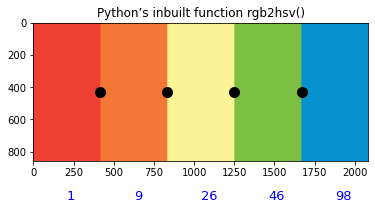

In [10]:
#NOTE Task 3.2
img2_b = cv2.imread('images\Figure2-b.png')      # read image
img2_b = cv2.cvtColor(img2_b, cv2.COLOR_BGR2RGB)

HSV_img2_b = cv2.cvtColor(img2_b, cv2.COLOR_RGB2HSV)
rs, cs, d  = HSV_img2_b.shape
H, S, V    = cv2.split(HSV_img2_b)

diffs = {} # dictionary that records the difference value of a point if the difference is greater than 0
for c in range(1, cs):
    diff = (abs(int(H[0][c]) - int(H[0][c - 1])) + abs(int(S[0][c]) - int(S[0][c - 1])) + abs(int(V[0][c]) - int(V[0][c - 1])))
    if diff != 0 and c != 1 and c != cs - 1:
        diffs[c - 1] = diff

edges = {1:[]} # dictionary that records the region's edges
pre   = 0 # this is previous point, keep it for detect the region's points
group = 1 # the current working region number range from 1~4
start = True # indicate whether we are working in the first region.
# record all the potential points that are belonged to different edge
for c, _ in diffs.items():
    if c - pre < 20 or start:
        start = False
        edges[group].append(c)
        pre = c
    else:
        group        = group + 1
        edges[group] = []
        pre          = c
#calculate the average point of all the potential points, and result will be the index point to detect the edge
for group, points in edges.items():
    edge = int(sum(points) / len(points))
    edges[group] = edge
print(edges)
# calculate the average value of the Hue value in 5 areas
avg_Hs = []
for area, edge in edges.items():
    if area == 1:
        avg1 = np.mean(H[:, 0 : edge + 1])
        avg_Hs.append(avg1)
        plt.text(int(edge / 2), 1100, int(avg1), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
        
        avg2 = np.mean(H[:, edge : edges[area + 1]])
        avg_Hs.append(avg2)
        plt.text(int((edge + edges[area + 1]) / 2), 1100, int(avg2), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    elif area == 4:
        avg = np.mean(H[:, edge : ])
        avg_Hs.append(avg)
        plt.text(int((edge + cs) / 2), 1100, int(avg), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    else: 
        avg = np.mean(H[:, edge : edges[area + 1]])
        avg_Hs.append(avg)
        plt.text(int((edge + edges[area + 1]) / 2), 1100, int(avg), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    
plt.imshow(img2_b)
plt.scatter([416, 834, 1250, 1668], [int(rs / 2), int(rs / 2), int(rs / 2) ,int(rs / 2)], s=100,c="black")
plt.title("Python’s inbuilt function rgb2hsv()")
plt.show


In [11]:
# Now we calculating the Hue value using the inbulit function
img2_b = cv2.imread('images\Figure2-b.png')      # read image
img2_b = cv2.cvtColor(img2_b, cv2.COLOR_BGR2RGB)

HSV_img2_b = cv_RGB2HSV(img2_b)

rs, cs, d  = HSV_img2_b.shape
H, S, V    = cv2.split(HSV_img2_b)

{1: 417, 2: 834, 3: 1250, 4: 1668}


<function matplotlib.pyplot.show(close=None, block=None)>

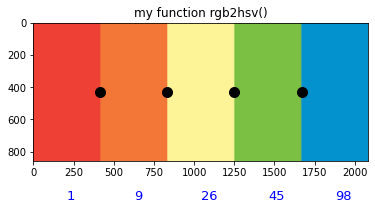

In [12]:
diffs = {}
for c in range(1, cs):
    diff = (abs(int(H[0][c]) - int(H[0][c - 1])) + abs(int(S[0][c]) - int(S[0][c - 1])) + abs(int(V[0][c]) - int(V[0][c - 1])))
    if diff != 0 and c > 10 and c != cs - 1:
        diffs[c - 1] = diff

edges = {1:[]}
pre   = 0
group = 1
start = True
for c, _ in diffs.items():
    if c - pre < 20 or start:
        start = False
        edges[group].append(c)
        pre = c
    else:
        group        = group + 1
        edges[group] = []
        pre          = c

for group, points in edges.items():
    edge = int(sum(points) / len(points))
    edges[group] = edge
print(edges)

avg_Hs = []
for area, edge in edges.items():
    if area == 1:
        avg1 = np.mean(H[:, 0 : edge + 1])
        avg_Hs.append(avg1)
        plt.text(int(edge / 2), 1100, int(avg1), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
        
        avg2 = np.mean(H[:, edge : edges[area + 1]])
        avg_Hs.append(avg2)
        plt.text(int((edge + edges[area + 1]) / 2), 1100, int(avg2), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    elif area == 4:
        avg = np.mean(H[:, edge : ])
        avg_Hs.append(avg)
        plt.text(int((edge + cs) / 2), 1100, int(avg), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    else: 
        avg = np.mean(H[:, edge : edges[area + 1]])
        avg_Hs.append(avg)
        plt.text(int((edge + edges[area + 1]) / 2), 1100, int(avg), fontdict={'size':'13','color':'b'}) # red number indicated average Y value
    
plt.imshow(img2_b)
plt.scatter([416, 834, 1250, 1668], [int(rs / 2), int(rs / 2), int(rs / 2) ,int(rs / 2)], s=100,c="black")
plt.title("my function rgb2hsv()")
plt.show